In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt


## loading train datasets


In [3]:
train_dir = r"C:\Users\vatsa\Desktop\Projects\machine component classification\train"

training_set = tf.keras.utils.image_dataset_from_directory(train_dir,labels= 'inferred' ,#generated from directory structure
                                                          label_mode='categorical',
                                                          class_names= None,
                                                          color_mode= 'rgb',
                                                          batch_size= 32,
                                                          image_size= (64, 64),
                                                          shuffle= True,
                                                          seed=None,
                                                          validation_split=None,
                                                          subset= None,
                                                           interpolation= 'bilinear', #used to resize the image
                                                          follow_links=False,
                                                          crop_to_aspect_ratio= False
)


Found 1187 files belonging to 2 classes.


## Building Model and its convolutional layers


In [4]:
cnn= tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Input(shape=(64, 64, 3))) # Use Input layer here
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units= 128, activation='relu')) #to make neurons 128

In [10]:
#output layer
cnn.add(tf.keras.layers.Dense(units= 2, activation= 'softmax')) #output neuron is 2 as categories is also 2

In [11]:
cnn.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy',metrics= ['accuracy'] )
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,644,738 (6.27 MB)

 Trainable params: 1,644,738 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

## Training model 

In [12]:
training_history = cnn.fit(x= training_set, epochs= 30)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6089 - loss: 143.2980
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9012 - loss: 0.8423
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.7474 - loss: 1.1027
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9013 - loss: 0.3752
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9136 - loss: 0.4994
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.8491 - loss: 0.7505
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.9630 - loss: 0.1802
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9500 - loss: 0.4477
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.9638 - loss: 0.1186
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9776 - loss: 0.0611
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9700 - loss: 0.0972
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/st

In [13]:
cnn.save('trained_model.keras')

In [14]:
# saving training history in json 
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [15]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss'])


In [16]:
print("training set accuracy: {} %".format (training_history.history['accuracy'][-1]*100))

training set accuracy: 97.97809720039368 %


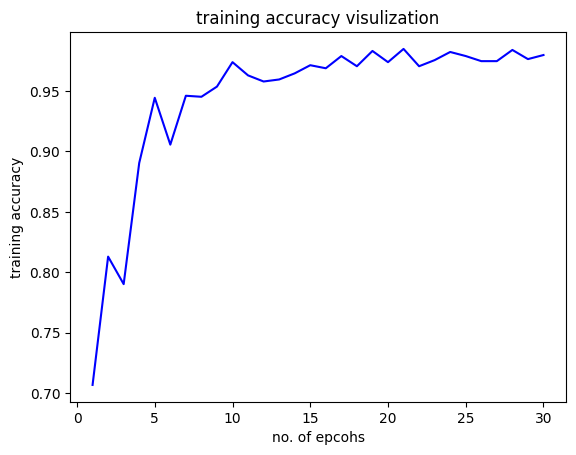

In [17]:
epochs = [i for i in range (1, 31)]
plt.plot(epochs, training_history.history['accuracy'], color='blue')
plt.xlabel('no. of epcohs')
plt.ylabel('training accuracy')
plt.title('training accuracy visulization')
plt.show()

## Loading test dataset

In [18]:
test_dir = r"C:\Users\vatsa\Desktop\Projects\machine component classification\test"

test_set= tf.keras.utils.image_dataset_from_directory(test_dir,labels= 'inferred' ,#generated from directory structure
                                                          label_mode='categorical',
                                                          class_names= None,
                                                          color_mode= 'rgb',
                                                          batch_size= 32,
                                                          image_size= (64, 64),
                                                          shuffle= True,
                                                          seed=None,
                                                          validation_split=None,
                                                          subset= None,
                                                          interpolation= 'bilinear', #used to resize the image
                                                          follow_links=False,
                                                          crop_to_aspect_ratio= False)

Found 254 files belonging to 2 classes.


## loading model

In [19]:
cnn= tf.keras.models.load_model("trained_model.keras")

In [20]:
test_loss, test_accuracy = cnn.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9819 - loss: 0.0452
Test Loss: 0.03507346659898758
Test Accuracy: 0.9881889820098877


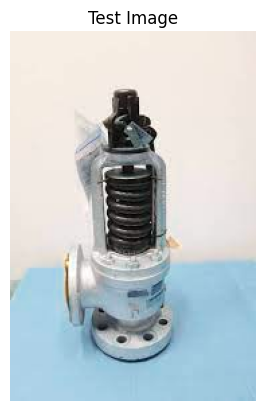

In [37]:
import cv2
img_path= (r"C:\Users\vatsa\Desktop\Projects\machine component classification\test\non-defective\images (52) - Copy - Copy.jpg")
img= cv2.imread(img_path,cv2.IMREAD_COLOR)
plt.imshow(img)
plt.title("Test Image")
plt.axis('off') 
plt.show()

In [41]:
image= tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr]) 
predictions= cnn.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0. 1.]]


In [42]:
result_index= np.where(predictions[0]==max(predictions[0]))
print(result_index[0][0])

1


In [43]:
print('it is a  {}'.format(test_set.class_names[result_index[0][0]]))

it is a  non-defective
